In [1]:
import warnings
warnings.filterwarnings('ignore')

In [53]:
import os
import pandas as pd
import numpy as np 
import tensorflow as tf
import seaborn as sns
import pickle as pkl
import matplotlib.pyplot as plt


import sklearn 

from datetime import datetime

In [3]:
# Display

pd.set_option('max_colwidth', 800)
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [4]:
# # reading dataset
# dataset_path = './dataset/train/train.csv'
# df = pd.read_csv(dataset_path)
# df.head()

In [5]:
# df.info()

In [6]:
# df.describe()

### checking for missing values

In [7]:
# df.isnull().sum()

### Data preprocessing

In [8]:
# df.columns

In [9]:
# # converting to datetime object
# date_col_li = ['booking_date', 'checkin_date', 'checkout_date']

# for da in date_col_li:
#     df[da] = pd.to_datetime(df[da])

In [10]:
# from sklearn.preprocessing import LabelEncoder

In [11]:
# object_col_li = df.select_dtypes(include='object').columns
# object_col_li

In [12]:
# le = LabelEncoder()

# for col in object_col_li:
#     df[col] = le.fit_transform(df[col])

# df.head()

### Saving data as pickle file

In [13]:
# with open('train.pkl','wb') as f:
#     pkl.dump(df,f)

### Loading preprocessed pickle dataset

In [16]:
with open('./dataset/train/train.pkl','rb') as f:
    df =  pkl.load(f)

In [17]:
df.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
0,9785,2018-05-04,2018-05-04,2018-06-04,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,5,1,24179,5,2,7,7.706428
1,4694,2015-01-23,2015-11-04,2015-04-16,1,1,2,0,46,3,3,4,5,2.0,7.0,5,2,5,1,24179,5,0,1,6.662563
2,278743,2015-01-28,2015-01-02,2015-05-02,1,1,2,0,47,1,5,4,4,2.0,7.0,1,2,5,1,24179,4,0,9,7.871602
3,276853,2015-02-05,2015-11-06,2015-06-16,1,1,2,2,46,2,2,3,5,2.0,7.0,2,2,5,1,24179,3,0,25,5.344943
4,196536,2015-02-09,2015-12-14,2015-12-19,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,5,1,24179,3,0,25,7.059346


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341424 entries, 0 to 341423
Data columns (total 24 columns):
reservation_id                        341424 non-null int64
booking_date                          341424 non-null datetime64[ns]
checkin_date                          341424 non-null datetime64[ns]
checkout_date                         341424 non-null datetime64[ns]
channel_code                          341424 non-null int64
main_product_code                     341424 non-null int64
numberofadults                        341424 non-null int64
numberofchildren                      341424 non-null int64
persontravellingid                    341424 non-null int64
resort_region_code                    341424 non-null int64
resort_type_code                      341424 non-null int64
room_type_booked_code                 341424 non-null int64
roomnights                            341424 non-null int64
season_holidayed_code                 341310 non-null float64
state_code_residence

In [19]:
df.describe()

,reservation_id,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
count,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341310.000000,336660.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000
mean,170711.500000,1.902810,2.208738,3.275361,0.362696,210.288905,1.772960,2.193832,2.890321,3.738346,2.673862,7.260708,4.763303,3.193390,4.102433,1.124209,50707.402886,3.290252,0.126166,17.315734,7.720801
std,98560.763491,0.915311,0.823779,1.756062,0.758019,865.735577,0.750806,1.551451,0.804260,2.479054,0.885650,4.701283,3.103909,1.167824,1.909182,0.329821,29259.826780,1.684267,0.439366,8.630901,1.090109
min,0.000000,1.000000,1.000000,0.000000,0.000000,45.000000,1.000000,0.000000,1.000000,-45.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.600397
25%,85355.750000,1.000000,2.000000,2.000000,0.000000,45.000000,1.000000,1.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,3.000000,1.000000,25305.000000,2.000000,0.000000,10.000000,7.187260
50%,170711.500000,2.000000,2.000000,3.000000,0.000000,45.000000,2.000000,2.000000,3.000000,3.000000,3.000000,8.000000,5.000000,3.000000,4.000000,1.000000,50721.500000,4.000000,0.000000,18.000000,7.860814
75%,256067.250000,3.000000,3.000000,4.000000,0.000000,45.000000,2.000000,3.000000,3.000000,4.000000,3.000000,8.000000,7.000000,4.000000,5.000000,1.000000,75992.250000,5.000000,0.000000,25.000000,8.419144
max,341423.000000,3.000000,7.000000,32.000000,13.000000,4995.000000,3.000000,7.000000,6.000000,60.000000,4.000000,38.000000,13.000000,24.000000,9.000000,2.000000,101326.000000,5.000000,3.000000,31.000000,10.816652


In [40]:
df.select_dtypes(include='datetime64').describe()

,booking_date,checkin_date,checkout_date
count,341424,341424,341424
unique,1621,1532,1531
top,2016-02-09 00:00:00,2016-08-10 00:00:00,2018-10-21 00:00:00
freq,1353,460,491
first,2014-01-10 00:00:00,2012-03-21 00:00:00,2012-03-18 00:00:00
last,2019-12-02 00:00:00,2019-12-02 00:00:00,2019-12-02 00:00:00


In [22]:
df.select_dtypes(include='datetime64').head(100)

,booking_date,checkin_date,checkout_date
0,2018-05-04,2018-05-04,2018-06-04
1,2015-01-23,2015-11-04,2015-04-16
2,2015-01-28,2015-01-02,2015-05-02
3,2015-02-05,2015-11-06,2015-06-16
4,2015-02-09,2015-12-14,2015-12-19
5,2015-01-12,2016-12-01,2016-01-13
6,2016-01-20,2016-01-20,2016-01-21
7,2016-08-22,2016-10-20,2016-10-25
8,2016-10-09,2016-09-18,2016-09-24
9,2016-03-08,2016-11-21,2016-11-24


In [24]:
df.columns

Index(['reservation_id', 'booking_date', 'checkin_date', 'checkout_date',
       'channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'member_age_buckets', 'booking_type_code', 'memberid',
       'cluster_code', 'reservationstatusid_code', 'resort_id',
       'amount_spent_per_room_night_scaled'],
      dtype='object')

In [39]:
for col in df.columns:
    print(col,df[col].nunique())

reservation_id 341424
booking_date 1621
checkin_date 1532
checkout_date 1531
channel_code 3
main_product_code 5
numberofadults 28
numberofchildren 12
persontravellingid 6
resort_region_code 3
resort_type_code 7
room_type_booked_code 6
roomnights 44
season_holidayed_code 4
state_code_residence 37
state_code_resort 11
total_pax 18
member_age_buckets 10
booking_type_code 2
memberid 101327
cluster_code 6
reservationstatusid_code 4
resort_id 32
amount_spent_per_room_night_scaled 278083


In [74]:
value_counts_li = [col for col in df.columns if df[col].nunique()<13]
value_counts_li

['channel_code',
 'main_product_code',
 'numberofchildren',
 'persontravellingid',
 'resort_region_code',
 'resort_type_code',
 'room_type_booked_code',
 'season_holidayed_code',
 'state_code_resort',
 'member_age_buckets',
 'booking_type_code',
 'cluster_code',
 'reservationstatusid_code']

In [75]:
for col in value_counts_li:
    print(str(col).center(50,"*"))
    print(df[col].value_counts().sort_index())
    print()
    

*******************channel_code*******************
1    161225
2     52157
3    128042
Name: channel_code, dtype: int64

****************main_product_code*****************
1     57822
2    177615
3     86247
4     18619
7      1121
Name: main_product_code, dtype: int64

*****************numberofchildren*****************
0     264250
1      37766
2      35164
3       2137
4       1658
5        181
6        187
7         20
8         44
10        14
12         2
13         1
Name: numberofchildren, dtype: int64

****************persontravellingid****************
45      267307
46       30569
47       31580
4752     10556
4753      1391
4995        21
Name: persontravellingid, dtype: int64

****************resort_region_code****************
1    143790
2    131361
3     66273
Name: resort_region_code, dtype: int64

*****************resort_type_code*****************
0      4462
1    154324
2     74154
3     48681
4     21619
5     26706
7     11478
Name: resort_type_code, dtype: int64

***

### scaling the target value

In [76]:
df['target'] = df['amount_spent_per_room_night_scaled'] *100
df['target'][:10]

0    770.642846
1    666.256293
2    787.160208
3    534.494329
4    705.934611
5    816.770663
6    644.983831
7    704.617197
8    539.420314
9    656.141249
Name: target, dtype: float64

### Plotting different values

/home/siddharth/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


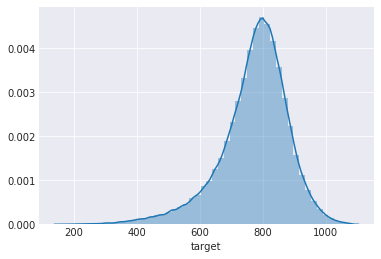

In [77]:
# Histogram of the target variable

sns.distplot(df['target'])

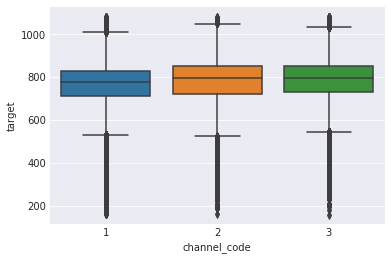

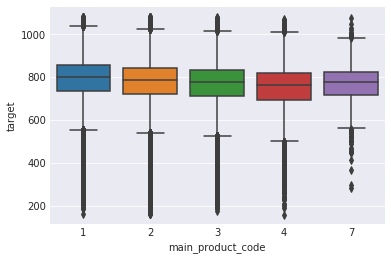

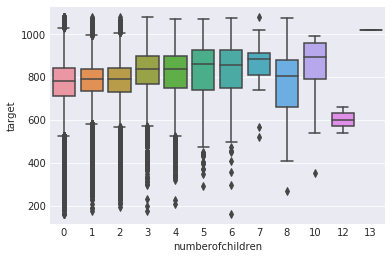

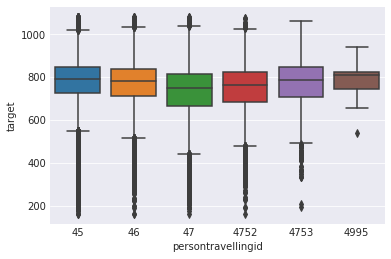

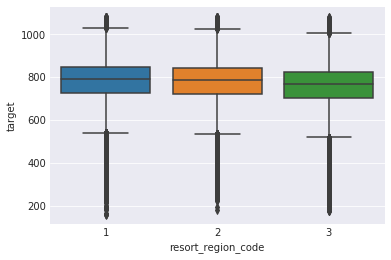

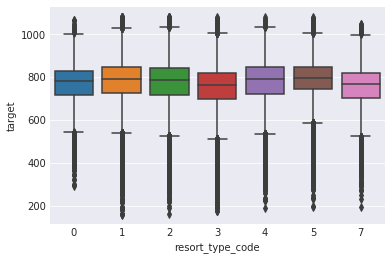

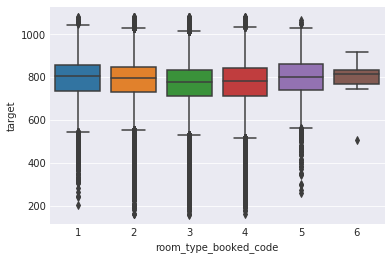

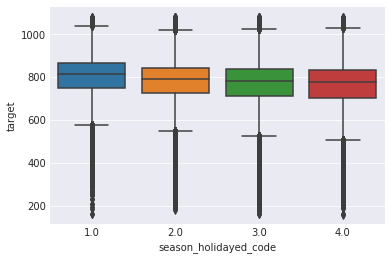

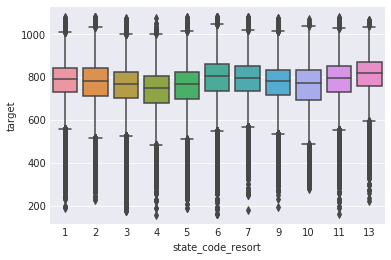

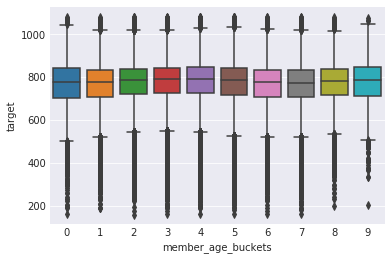

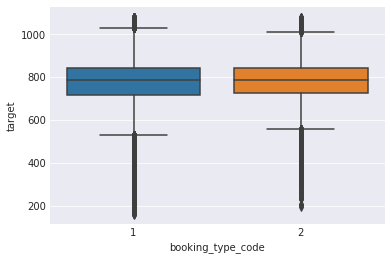

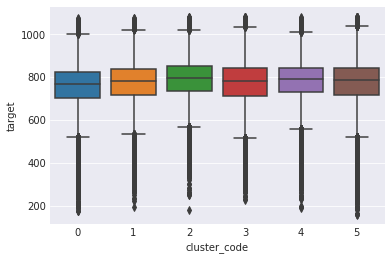

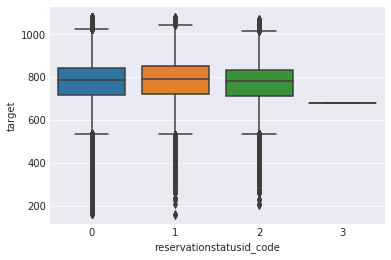

In [78]:
# box plot of all the value_counts list


#f,axes = plt.subplots(6,2,figsize = (15,15))

for i,col in enumerate(value_counts_li):
    sns.boxplot(x=col,y='target',data=df)
    plt.show()

In [82]:
# creating lineplots

for col in value_counts_li:
    print(str(col).center(50,"*"))
    print(df.groupby(col)['target'].mean().sort_values())
    print()


*******************channel_code*******************
channel_code
1    761.811066
2    778.007651
3    782.595897
Name: target, dtype: float64

****************main_product_code*****************
main_product_code
4    747.955682
3    763.408768
7    769.833723
2    774.151372
1    786.463552
Name: target, dtype: float64

*****************numberofchildren*****************
numberofchildren
12     602.011436
8      759.088293
0      769.473967
2      778.423505
1      780.021146
4      807.654400
5      808.129950
3      814.206014
6      816.761938
10     833.093864
7      853.893926
13    1019.117631
Name: target, dtype: float64

****************persontravellingid****************
persontravellingid
47      731.310264
4752    746.301638
46      766.946061
4753    767.609829
45      778.524391
4995    780.993474
Name: target, dtype: float64

****************resort_region_code****************
resort_region_code
3    754.162361
2    774.362691
1    778.253135
Name: target, dtype: float64

***

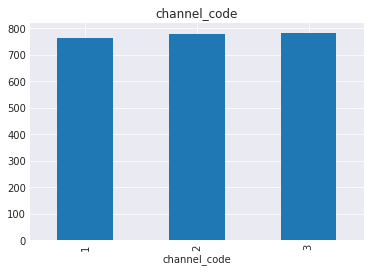

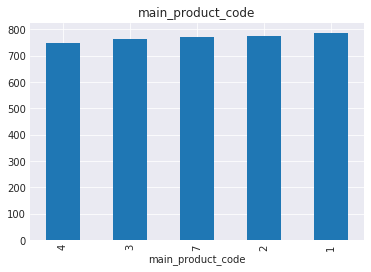

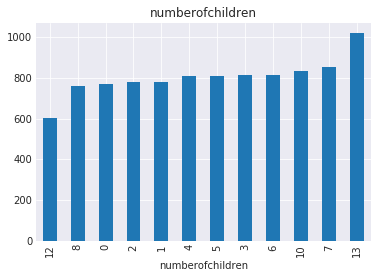

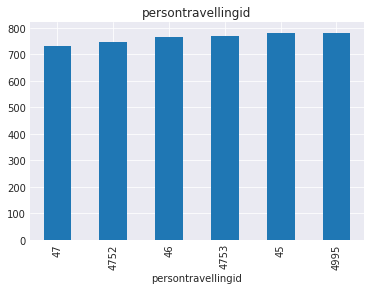

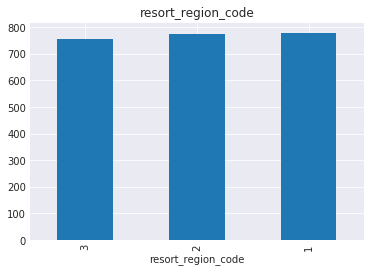

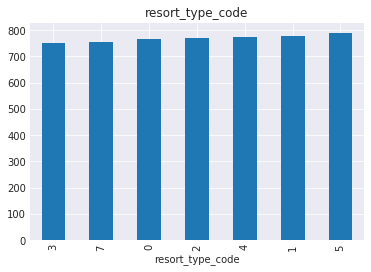

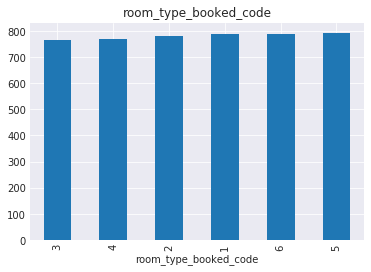

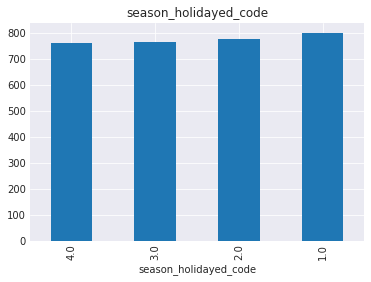

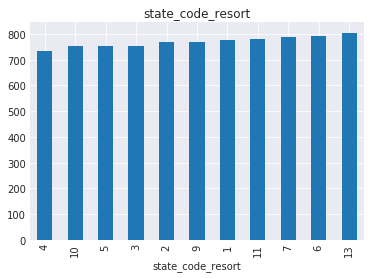

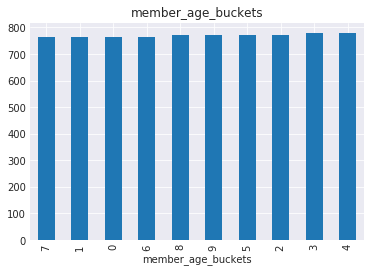

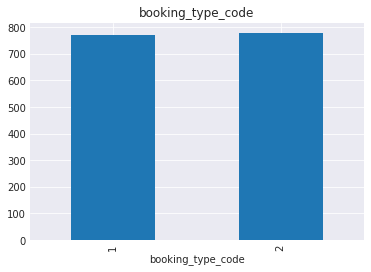

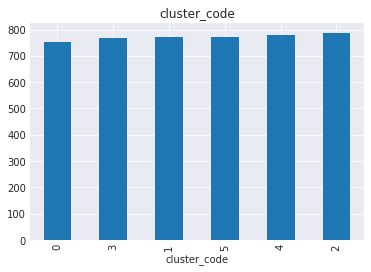

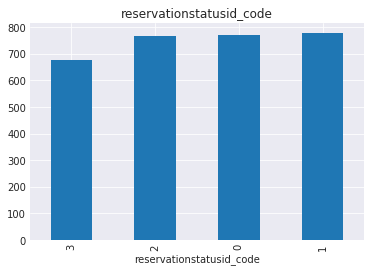

In [79]:
# creating lineplots

for col in value_counts_li:
    df.groupby(col)['target'].mean().sort_values().plot.bar()
    plt.title(col)
    plt.show()

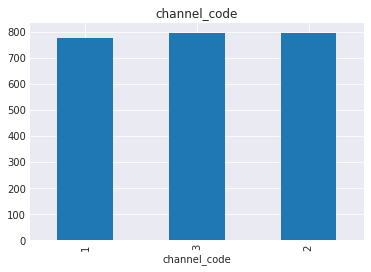

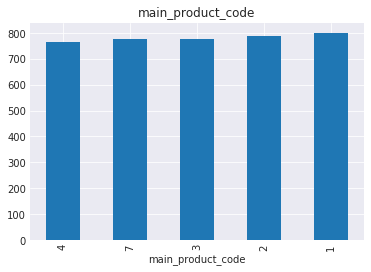

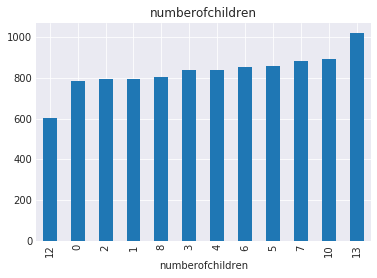

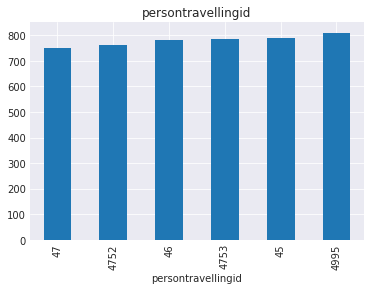

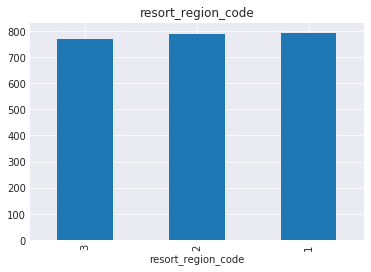

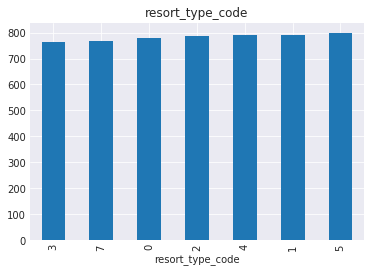

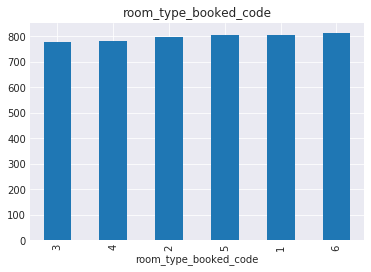

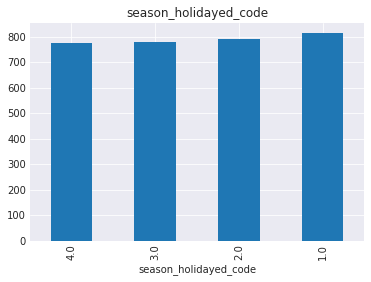

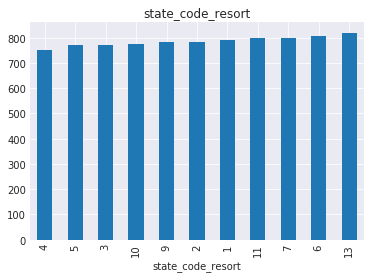

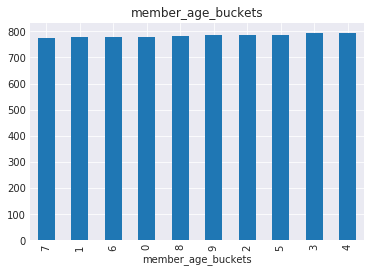

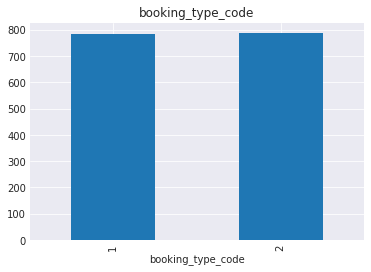

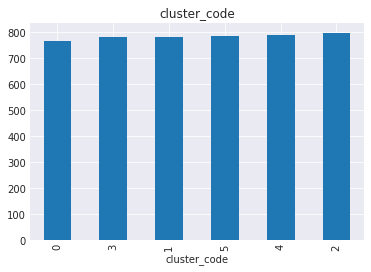

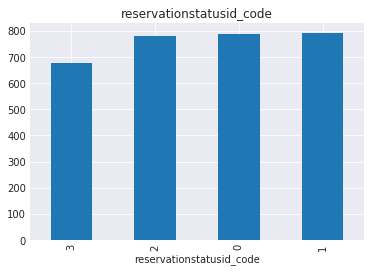

In [80]:
for col in value_counts_li:
    df.groupby(col)['target'].median().sort_values().plot.bar()
    plt.title(col)
    plt.show()